(256, 256, 256)
(256, 256, 256)


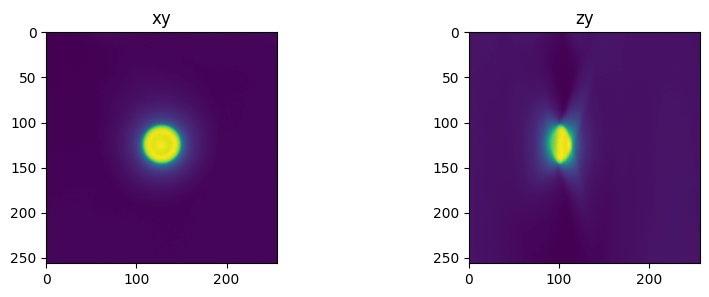

In [1]:
from skimage.io import imread
from tnia.plotting.projections import show_xy_zy_max
import cupy as cp
import numpy as np

path_=r"D:\images\tnia-python-images\deconvolution\bead"

bead=imread(path_+"/Bead.tif")
psf=imread(path_+"/PSF-Bead.tif")

print(bead.shape)
print(psf.shape)

fig=show_xy_zy_max(bead)

bpg=(1024**3)

In [2]:
print(bead.dtype, psf.dtype)
bead = bead.astype(np.float32)
psf = psf.astype(np.float32)
psf = psf/psf.sum()

uint16 uint16


In [3]:
mempool = cp.get_default_memory_pool()
print("At beginning, used = {}".format(mempool.used_bytes()))

At beginning, used = 0


After cupy array creation, used = 0.56494140625


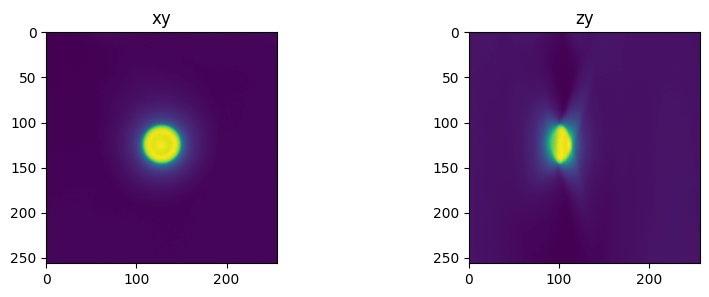

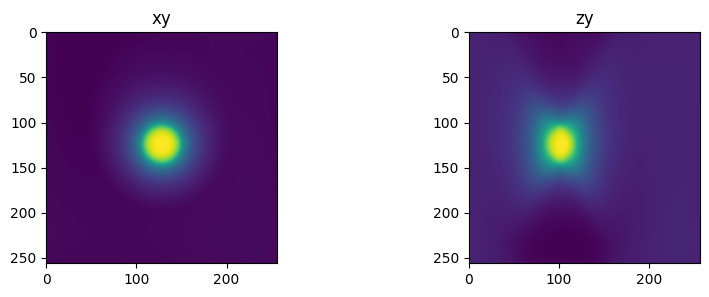

In [4]:
bead_cp = cp.array(bead)
psf_cp = cp.array(psf)
psf_cp_shift = cp.fft.ifftshift(psf_cp)
otf_cp = cp.fft.rfftn(psf_cp_shift)
bead_cp_fft = cp.fft.rfftn(bead_cp)
temp = bead_cp_fft * otf_cp
convolved_cp = cp.fft.irfftn(temp)
convolved = cp.asnumpy(convolved_cp)

fig = show_xy_zy_max(bead)
fig = show_xy_zy_max(convolved)
print("After cupy array creation, used = {}".format(mempool.used_bytes()/bpg))

In [5]:
mempool.free_all_blocks()
print("After free_all_blocks, used = {}".format(mempool.used_bytes()/bpg))

After free_all_blocks, used = 0.56494140625


In [6]:
del bead_cp
del psf_cp
del psf_cp_shift
del otf_cp
del bead_cp_fft
del temp
del convolved_cp

mempool.free_all_blocks()
print("After del, used = {}".format(mempool.used_bytes()/bpg))

After del, used = 0.1259765625


In [7]:
cache = cp.fft.config.get_plan_cache()
cache.clear()
print("After clear, used = {}".format(mempool.used_bytes()/bpg))

After clear, used = 0.0
